In [118]:
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore", ConvergenceWarning)
warnings.filterwarnings("ignore", message="Variables are collinear")
pd.options.mode.chained_assignment = None


In [119]:
data = pd.read_csv("/Users/ethanschultz/Downloads/cannabis_full.csv")
data.dropna(inplace=True)
data_filter = data[(data["Type"] == "indica") | (data["Type"] == "sativa")]
data_filter.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Part 1

In [120]:

X = data_filter.drop(columns=["Type","Strain","Effects","Flavor"])
y = data_filter["Type"].map({"indica": 0, "sativa": 1})  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("lda", LinearDiscriminantAnalysis())
])

param_grid = {
    "lda__solver": ["svd", "lsqr", "eigen"],
    "lda__shrinkage": [None, "auto", 0.1, 0.5, 1.0]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'lda__shrinkage': 'auto', 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.871173030615755
Test Accuracy: 0.8551401869158879
Confusion Matrix:
 [[112   5]
 [ 26  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       117
           1       0.93      0.73      0.82        97

    accuracy                           0.86       214
   macro avg       0.87      0.84      0.85       214
weighted avg       0.87      0.86      0.85       214

Best Parameters: {'lda__shrinkage': 'auto', 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.871173030615755
Test Accuracy: 0.8551401869158879
Confusion Matrix:
 [[112   5]
 [ 26  71]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88       117
           1       0.93      0.73      0.82        97

    accuracy                           0.86       214
   macro avg       0.87

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.

I choose to use accuracy as a metric because it seems that both classes indica and sativa are balenced in the dataset and have similar number of observations which makes accuracy a good metric. Also accuracy is a very easy to interperet metric and also is very comparable when seeing how well a model preformed in classifying.

In [121]:
#QDA
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("qda", QuadraticDiscriminantAnalysis())
])

param_grid = {
    "qda__reg_param": [0.0, 0.1, 0.5, 1.0],  
    "qda__priors": [None, [0.5, 0.5]]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'qda__priors': None, 'qda__reg_param': 1.0}
Best Cross-Validated Accuracy: 0.8700103199174405
Test Accuracy: 0.8738317757009346
Confusion Matrix:
 [[110   7]
 [ 20  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       117
           1       0.92      0.79      0.85        97

    accuracy                           0.87       214
   macro avg       0.88      0.87      0.87       214
weighted avg       0.88      0.87      0.87       214

Best Parameters: {'qda__priors': None, 'qda__reg_param': 1.0}
Best Cross-Validated Accuracy: 0.8700103199174405
Test Accuracy: 0.8738317757009346
Confusion Matrix:
 [[110   7]
 [ 20  77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       117
           1       0.92      0.79      0.85        97

    accuracy                           0.87       214
   macro avg       0.88      0.

In [122]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", LinearSVC(dual="auto"))  
])

param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100, 1000] 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svc__C': 0.01}
Best Cross-Validated Accuracy: 0.8618300653594773
Test Accuracy: 0.8644859813084113
Confusion Matrix:
 [[109   8]
 [ 21  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       117
           1       0.90      0.78      0.84        97

    accuracy                           0.86       214
   macro avg       0.87      0.86      0.86       214
weighted avg       0.87      0.86      0.86       214

Best Parameters: {'svc__C': 0.01}
Best Cross-Validated Accuracy: 0.8618300653594773
Test Accuracy: 0.8644859813084113
Confusion Matrix:
 [[109   8]
 [ 21  76]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       117
           1       0.90      0.78      0.84        97

    accuracy                           0.86       214
   macro avg       0.87      0.86      0.86       214
weighted avg       0.87      0.86

In [123]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svm", SVC(kernel='poly'))  
])

param_grid = {
    "svm__C": [0.01, 0.1, 1, 10, 100, 1000],    
    "svm__degree": [2, 3, 4],                   
    "svm__coef0": [0, 0.1, 0.5, 1]             
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svm__C': 0.1, 'svm__coef0': 1, 'svm__degree': 4}
Best Cross-Validated Accuracy: 0.8571448228414171
Test Accuracy: 0.8738317757009346
Confusion Matrix:
 [[113   4]
 [ 23  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       117
           1       0.95      0.76      0.85        97

    accuracy                           0.87       214
   macro avg       0.89      0.86      0.87       214
weighted avg       0.88      0.87      0.87       214

Best Parameters: {'svm__C': 0.1, 'svm__coef0': 1, 'svm__degree': 4}
Best Cross-Validated Accuracy: 0.8571448228414171
Test Accuracy: 0.8738317757009346
Confusion Matrix:
 [[113   4]
 [ 23  74]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       117
           1       0.95      0.76      0.85        97

    accuracy                           0.87       214
   macro avg       

Part 2

In [124]:
#DT
data.dropna(subset="Type")
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor"])
y = data["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    "max_depth": [3, 5, 10, None],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.6284509564509564
Test Accuracy: 0.6104783599088838
Confusion Matrix:
 [[157  44  25]
 [ 62  75   1]
 [ 33   6  36]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.62      0.69      0.66       226
      indica       0.60      0.54      0.57       138
      sativa       0.58      0.48      0.53        75

    accuracy                           0.61       439
   macro avg       0.60      0.57      0.58       439
weighted avg       0.61      0.61      0.61       439

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.6284509564509564
Test Accuracy: 0.6104783599088838
Confusion Matrix:
 [[157  44  25]
 [ 62  75   1]
 [ 33   6  36]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.62      0.69      0.66       226
  

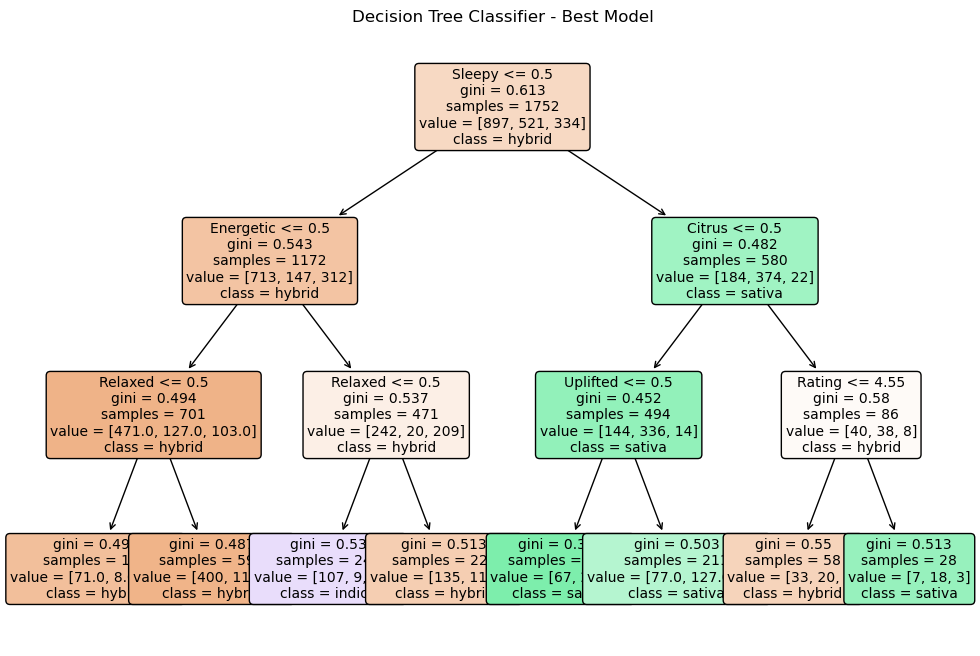

In [63]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

best_model.fit(X_train, y_train)

plt.figure(figsize= (12,8))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=y.unique(), rounded=True, fontsize=10)
plt.title("Decision Tree Classifier - Best Model")
plt.show()


In [125]:
#LDA
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("lda", LinearDiscriminantAnalysis())
])

param_grid = {
    "lda__solver": ["svd", "lsqr", "eigen"],
    "lda__shrinkage": [None, "auto", 0.1, 0.5, 1.0]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.6393064713064713
Test Accuracy: 0.6104783599088838
Confusion Matrix:
 [[144  42  40]
 [ 52  85   1]
 [ 32   4  39]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.63      0.64      0.63       226
      indica       0.65      0.62      0.63       138
      sativa       0.49      0.52      0.50        75

    accuracy                           0.61       439
   macro avg       0.59      0.59      0.59       439
weighted avg       0.61      0.61      0.61       439

Best Parameters: {'lda__shrinkage': 0.5, 'lda__solver': 'lsqr'}
Best Cross-Validated Accuracy: 0.6393064713064713
Test Accuracy: 0.6104783599088838
Confusion Matrix:
 [[144  42  40]
 [ 52  85   1]
 [ 32   4  39]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.63      0.64      0.63       226
      indica       0.65      0.62   

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.

In [126]:
#QDA
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("qda", QuadraticDiscriminantAnalysis())
])

param_grid = {
    "qda__reg_param": [0.0, 0.1, 0.5, 1.0],  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'qda__reg_param': 1.0}
Best Cross-Validated Accuracy: 0.6256068376068376
Test Accuracy: 0.6241457858769932
Confusion Matrix:
 [[145  42  39]
 [ 49  87   2]
 [ 29   4  42]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.65      0.64      0.65       226
      indica       0.65      0.63      0.64       138
      sativa       0.51      0.56      0.53        75

    accuracy                           0.62       439
   macro avg       0.60      0.61      0.61       439
weighted avg       0.63      0.62      0.63       439

Best Parameters: {'qda__reg_param': 1.0}
Best Cross-Validated Accuracy: 0.6256068376068376
Test Accuracy: 0.6241457858769932
Confusion Matrix:
 [[145  42  39]
 [ 49  87   2]
 [ 29   4  42]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.65      0.64      0.65       226
      indica       0.65      0.63      0.64       138
      sativa       0.51     

In [127]:
pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": list(range(1, 21))  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'knn__n_neighbors': 20}
Best Cross-Validated Accuracy: 0.5725063085063085
Test Accuracy: 0.5899772209567198
Confusion Matrix:
 [[187  30   9]
 [ 75  63   0]
 [ 62   4   9]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.58      0.83      0.68       226
      indica       0.65      0.46      0.54       138
      sativa       0.50      0.12      0.19        75

    accuracy                           0.59       439
   macro avg       0.58      0.47      0.47       439
weighted avg       0.59      0.59      0.55       439

Best Parameters: {'knn__n_neighbors': 20}
Best Cross-Validated Accuracy: 0.5725063085063085
Test Accuracy: 0.5899772209567198
Confusion Matrix:
 [[187  30   9]
 [ 75  63   0]
 [ 62   4   9]]
Classification Report:
               precision    recall  f1-score   support

      hybrid       0.58      0.83      0.68       226
      indica       0.65      0.46      0.54       138
      sativa       0.50   

My metrics for these models when all three types are included the accuracy scores are all worse than in part one. The accuracy scores for the first part were all in the 0.80's whereas all these are around the 0.60 range. It is likley cause the addition of the hybrid type made it much harder to classify because it contains qualities of both indica strains and sativa strains. This combination of traits makes the model harder to dinstinguish between each distinct category thus resulting in a lower accuracy.

Part 3

In [128]:
data["is_sativa"] = (data["Type"] == "sativa").astype(int)
data["is_indica"] = (data["Type"] == "indica").astype(int)
data["is_hybrid"] = (data["Type"] == "hybrid").astype(int)
data

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,is_sativa,is_indica,is_hybrid
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,Zeus-Og,hybrid,4.7,"Happy,Uplifted,Relaxed,Euphoric,Energetic","Earthy,Woody,Pine",0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
2347,Zkittlez,indica,4.6,"Relaxed,Happy,Euphoric,Uplifted,Sleepy","Sweet,Berry,Grape",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2348,Zombie-Kush,indica,5.0,"Relaxed,Sleepy,Talkative,Euphoric,Happy","Earthy,Sweet,Spicy/Herbal",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
2349,Zombie-Og,indica,4.4,"Relaxed,Sleepy,Euphoric,Happy,Hungry","Sweet,Earthy,Pungent",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0


In [129]:
#SVC for indica vs rest
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor", "is_indica", "is_hybrid", "is_sativa"])
y = data["is_indica"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", OneVsRestClassifier(LinearSVC(dual="auto")))  
])

param_grid = {
    "svc__estimator__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.7888038401660612
Test Accuracy: 0.8193430656934306
Confusion Matrix:
 [[341  42]
 [ 57 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       383
           1       0.72      0.65      0.69       165

    accuracy                           0.82       548
   macro avg       0.79      0.77      0.78       548
weighted avg       0.82      0.82      0.82       548

Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.7888038401660612
Test Accuracy: 0.8193430656934306
Confusion Matrix:
 [[341  42]
 [ 57 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       383
           1       0.72      0.65      0.69       165

    accuracy                           0.82       548
   macro avg       0.79      0.77      0.78       548
weighted av

In [130]:
#SVC for sativa vs rest
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor", "is_indica", "is_hybrid", "is_sativa"])
y = data["is_sativa"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", OneVsRestClassifier(LinearSVC(dual="auto")))  
])

param_grid = {
    "svc__estimator__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.8302005337682555
Test Accuracy: 0.8138686131386861
Confusion Matrix:
 [[418  28]
 [ 74  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       446
           1       0.50      0.27      0.35       102

    accuracy                           0.81       548
   macro avg       0.67      0.61      0.62       548
weighted avg       0.78      0.81      0.79       548

Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.8302005337682555
Test Accuracy: 0.8138686131386861
Confusion Matrix:
 [[418  28]
 [ 74  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89       446
           1       0.50      0.27      0.35       102

    accuracy                           0.81       548
   macro avg       0.67      0.61      0.62       548
weighted av

In [131]:
#SVC for hybrid vs rest
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor", "is_indica", "is_hybrid", "is_sativa"])
y = data["is_hybrid"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", OneVsRestClassifier(LinearSVC(dual="auto")))  
])

param_grid = {
    "svc__estimator__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'svc__estimator__C': 10}
Best Cross-Validated Accuracy: 0.6098450589369115
Test Accuracy: 0.6715328467153284
Confusion Matrix:
 [[163 104]
 [ 76 205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       267
           1       0.66      0.73      0.69       281

    accuracy                           0.67       548
   macro avg       0.67      0.67      0.67       548
weighted avg       0.67      0.67      0.67       548

Best Parameters: {'svc__estimator__C': 10}
Best Cross-Validated Accuracy: 0.6098450589369115
Test Accuracy: 0.6715328467153284
Confusion Matrix:
 [[163 104]
 [ 76 205]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.61      0.64       267
           1       0.66      0.73      0.69       281

    accuracy                           0.67       548
   macro avg       0.67      0.67      0.67       548
weighted avg   

In [132]:
# Logistic Regression indica vs rest
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor", "is_indica", "is_hybrid", "is_sativa"])
y = data["is_indica"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("log", LogisticRegression())  
])

param_grid = {
    "log__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'log__C': 0.1}
Best Cross-Validated Accuracy: 0.78880569352806
Test Accuracy: 0.8321167883211679
Confusion Matrix:
 [[345  38]
 [ 54 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       383
           1       0.74      0.67      0.71       165

    accuracy                           0.83       548
   macro avg       0.80      0.79      0.79       548
weighted avg       0.83      0.83      0.83       548

Best Parameters: {'log__C': 0.1}
Best Cross-Validated Accuracy: 0.78880569352806
Test Accuracy: 0.8321167883211679
Confusion Matrix:
 [[345  38]
 [ 54 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88       383
           1       0.74      0.67      0.71       165

    accuracy                           0.83       548
   macro avg       0.80      0.79      0.79       548
weighted avg       0.83      0.83      

In [133]:
# Logistic Regression sativa vs rest
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor", "is_indica", "is_hybrid", "is_sativa"])
y = data["is_sativa"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("log", LogisticRegression())  
])

param_grid = {
    "log__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'log__C': 0.1}
Best Cross-Validated Accuracy: 0.8283768255615687
Test Accuracy: 0.8102189781021898
Confusion Matrix:
 [[417  29]
 [ 75  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       446
           1       0.48      0.26      0.34       102

    accuracy                           0.81       548
   macro avg       0.66      0.60      0.62       548
weighted avg       0.78      0.81      0.79       548

Best Parameters: {'log__C': 0.1}
Best Cross-Validated Accuracy: 0.8283768255615687
Test Accuracy: 0.8102189781021898
Confusion Matrix:
 [[417  29]
 [ 75  27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       446
           1       0.48      0.26      0.34       102

    accuracy                           0.81       548
   macro avg       0.66      0.60      0.62       548
weighted avg       0.78      0.81  

In [134]:
# Logistic Regression hybrid vs rest
X = data.drop(columns=["Type", "Strain", "Effects", "Flavor", "is_indica", "is_hybrid", "is_sativa"])
y = data["is_hybrid"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("log", LogisticRegression())  
])

param_grid = {
    "log__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'log__C': 10}
Best Cross-Validated Accuracy: 0.6153273037289644
Test Accuracy: 0.6806569343065694
Confusion Matrix:
 [[167 100]
 [ 75 206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       267
           1       0.67      0.73      0.70       281

    accuracy                           0.68       548
   macro avg       0.68      0.68      0.68       548
weighted avg       0.68      0.68      0.68       548

Best Parameters: {'log__C': 10}
Best Cross-Validated Accuracy: 0.6153273037289644
Test Accuracy: 0.6806569343065694
Confusion Matrix:
 [[167 100]
 [ 75 206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.63      0.66       267
           1       0.67      0.73      0.70       281

    accuracy                           0.68       548
   macro avg       0.68      0.68      0.68       548
weighted avg       0.68      0.68    

Of these six models the one that did the best at distinguishing the target category was the logistic regression for classifying indica vs the rest. The model that did the worste was the SVC model for the traget category of hybrid vs the rest. This does make sense and agrees to what we found earlier where indica had the most TP cases in out confusion matrices and classifying the target class of hybrid was the hardest because it contains qualities of both sativa and indica strains.

OVO

In [141]:
data = pd.read_csv("/Users/ethanschultz/Downloads/cannabis_full.csv")
data.dropna(inplace=True)
data1 = data[(data["Type"] == "indica") | (data["Type"] == "sativa")]
data2 = data[(data["Type"] == "indica")  | (data["Type"] =='hybrid')]
data3 = data[(data["Type"] == "sativa")  | (data["Type"] =='hybrid')]
data1["indica_vs_sativa"] = data1["Type"].map({"indica": 1, "sativa": 0})
data2["indica_vs_hybrid"] = data2["Type"].map({"indica": 1, "hybrid": 0})
data3["hybrid_vs_sativa"] = data3["Type"].map({"hybrid": 1, "sativa": 0})
data1.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,Hungry,Talkative,Giggly,Focused,Sleepy,Dry,Mouth,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,indica_vs_sativa
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,303-Og,indica,4.2,"Relaxed,Happy,Euphoric,Uplifted,Giggly","Citrus,Pungent,Earthy",0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,3D-Cbd,sativa,4.6,"Uplifted,Focused,Happy,Talkative,Relaxed","Earthy,Woody,Flowery",0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,3X-Crazy,indica,4.4,"Relaxed,Tingly,Happy,Euphoric,Uplifted","Earthy,Grape,Sweet",0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
12,5Th-Element,indica,4.4,"Relaxed,Focused,Euphoric,Uplifted,Aroused","Earthy,Woody,Pine",0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [142]:
#SVC Indica vs Sativa
X = data1.drop(columns=["Type", "Strain", "Effects", "Flavor", "indica_vs_sativa"])
y = data1["indica_vs_sativa"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", OneVsRestClassifier(LinearSVC(dual="auto")))  
])

param_grid = {
    "svc__estimator__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.8464518633540372
Test Accuracy: 0.8764044943820225
Confusion Matrix:
 [[ 86  16]
 [ 17 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       102
           1       0.90      0.90      0.90       165

    accuracy                           0.88       267
   macro avg       0.87      0.87      0.87       267
weighted avg       0.88      0.88      0.88       267

Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.8464518633540372
Test Accuracy: 0.8764044943820225
Confusion Matrix:
 [[ 86  16]
 [ 17 148]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       102
           1       0.90      0.90      0.90       165

    accuracy                           0.88       267
   macro avg       0.87      0.87      0.87       267
weighted av

In [143]:
#SVC Indica vs hybrid
X = data2.drop(columns=["Type", "Strain", "Effects", "Flavor", "indica_vs_hybrid"])
y = data2["indica_vs_hybrid"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", OneVsRestClassifier(LinearSVC(dual="auto")))  
])

param_grid = {
    "svc__estimator__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'svc__estimator__C': 0.1}
Best Cross-Validated Accuracy: 0.7544971770361675
Test Accuracy: 0.7376681614349776
Confusion Matrix:
 [[224  57]
 [ 60 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       281
           1       0.65      0.64      0.64       165

    accuracy                           0.74       446
   macro avg       0.72      0.72      0.72       446
weighted avg       0.74      0.74      0.74       446

Best Parameters: {'svc__estimator__C': 0.1}
Best Cross-Validated Accuracy: 0.7544971770361675
Test Accuracy: 0.7376681614349776
Confusion Matrix:
 [[224  57]
 [ 60 105]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       281
           1       0.65      0.64      0.64       165

    accuracy                           0.74       446
   macro avg       0.72      0.72      0.72       446
weighted avg 

In [144]:
#SVC hybrid vs Sativa
X = data3.drop(columns=["Type", "Strain", "Effects", "Flavor", "hybrid_vs_sativa"])
y = data3["hybrid_vs_sativa"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("svc", OneVsRestClassifier(LinearSVC(dual="auto")))  
])

param_grid = {
    "svc__estimator__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.7397759635466109
Test Accuracy: 0.7676240208877284
Confusion Matrix:
 [[ 36  66]
 [ 23 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.35      0.45       102
           1       0.80      0.92      0.85       281

    accuracy                           0.77       383
   macro avg       0.70      0.64      0.65       383
weighted avg       0.75      0.77      0.74       383

Best Parameters: {'svc__estimator__C': 0.01}
Best Cross-Validated Accuracy: 0.7397759635466109
Test Accuracy: 0.7676240208877284
Confusion Matrix:
 [[ 36  66]
 [ 23 258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.35      0.45       102
           1       0.80      0.92      0.85       281

    accuracy                           0.77       383
   macro avg       0.70      0.64      0.65       383
weighted av

In [110]:
# Logistic Regression indiva vs sativa
X = data1.drop(columns=["Type", "Strain", "Effects", "Flavor", "indica_vs_sativa"])
y = data1["indica_vs_sativa"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("log", LogisticRegression())  
])

param_grid = {
    "log__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'log__C': 0.01}
Best Cross-Validated Accuracy: 0.8502018633540374
Test Accuracy: 0.8801498127340824
Confusion Matrix:
 [[ 82  20]
 [ 12 153]]
Best Parameters: {'log__C': 0.01}
Best Cross-Validated Accuracy: 0.8502018633540374
Test Accuracy: 0.8801498127340824
Confusion Matrix:
 [[ 82  20]
 [ 12 153]]


In [145]:
# Logistic Regression indiva vs hybrid
X = data2.drop(columns=["Type", "Strain", "Effects", "Flavor", "indica_vs_hybrid"])
y = data2["indica_vs_hybrid"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("log", LogisticRegression())  
])

param_grid = {
    "log__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'log__C': 0.01}
Best Cross-Validated Accuracy: 0.7552434456928838
Test Accuracy: 0.7533632286995515
Confusion Matrix:
 [[235  46]
 [ 64 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       281
           1       0.69      0.61      0.65       165

    accuracy                           0.75       446
   macro avg       0.74      0.72      0.73       446
weighted avg       0.75      0.75      0.75       446

Best Parameters: {'log__C': 0.01}
Best Cross-Validated Accuracy: 0.7552434456928838
Test Accuracy: 0.7533632286995515
Confusion Matrix:
 [[235  46]
 [ 64 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       281
           1       0.69      0.61      0.65       165

    accuracy                           0.75       446
   macro avg       0.74      0.72      0.73       446
weighted avg       0.75      0.75

In [146]:
# Logistic Regression hybrid vs sativa
X = data3.drop(columns=["Type", "Strain", "Effects", "Flavor", "hybrid_vs_sativa"])
y = data3["hybrid_vs_sativa"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("log", LogisticRegression())  
])

param_grid = {
    "log__C": [0.01, 0.1, 1, 10, 100, 1000]  
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'log__C': 0.1}
Best Cross-Validated Accuracy: 0.7397683690905639
Test Accuracy: 0.7597911227154047
Confusion Matrix:
 [[ 35  67]
 [ 25 256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.34      0.43       102
           1       0.79      0.91      0.85       281

    accuracy                           0.76       383
   macro avg       0.69      0.63      0.64       383
weighted avg       0.74      0.76      0.74       383

Best Parameters: {'log__C': 0.1}
Best Cross-Validated Accuracy: 0.7397683690905639
Test Accuracy: 0.7597911227154047
Confusion Matrix:
 [[ 35  67]
 [ 25 256]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.34      0.43       102
           1       0.79      0.91      0.85       281

    accuracy                           0.76       383
   macro avg       0.69      0.63      0.64       383
weighted avg       0.74      0.76  

Based on the six models the one that did the best was the logistic OVO for comparing indica vs saativa and the one that did the worst was the SVC OVO for indica vs hybrid. This again makes intuitive sense becasue we would expect the best model to be able to most acurately distinguish indica vs sativa because they are most different in regrards to their profiles and it to do worste at distinguishing hybrid strains from either sativa or indica it just so happened that it was worse at distinguishing indica from in in this data set it was trained on.

By deafult logistic regression uses OvR and by deafult SVC uses OvO

Chat GPT was used throughout the lab for errors encountured along the way to fix provided code. It was also used for streamlining some of the functions and other processes. Lastly it was used to determine the tuning hyperparameters for the varioud models used if the parameters were not directly listed in the book.